<a href="https://colab.research.google.com/github/moonyaeyoon/AI-Lab/blob/hw1/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 💻HW1

---


 ▶ 알고리즘 2분반  
 ▶ 문예윤  
 ▶ 게임전공  
 ▶ 202111078



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

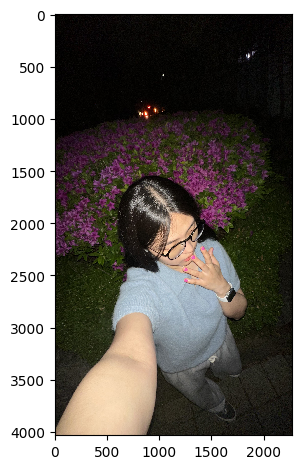

In [ ]:
#디지털 이미지 읽고 보여주기
img = io.imread('/content/drive/MyDrive/AI LAB/HW/hw1/hw1Img.jpg')
io.imshow(img)

####① 이미지 크롭하기####

---


이미지를 크롭하여 전체 이미지를 볼 수 없도록해 privacy를 보호하는 방법을 사용했습니다.
* crop_img[2200:2500,1350:1650]: 세로축(행) 2200 ~ 2500 / 가로축(열) 1350 ~ 1650까지 영역 크롭  
* subplot 생성해 원래 이미지와 크롭한 이미지 한번에 보여주기
* io.imshow() : 원래 이미지와 크롭한 이미지 시각화  

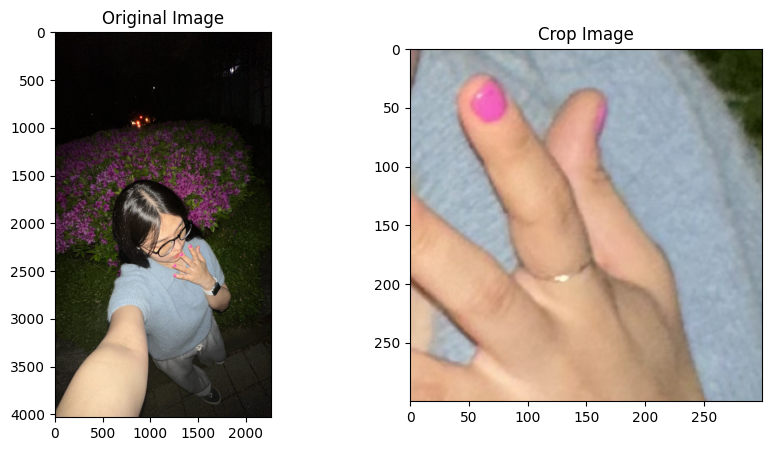

In [ ]:
#image crop
crop_img = img[2200:2500,1350:1650]

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 원래 이미지 표시
axes[0].imshow(img)
axes[0].set_title('Original Image')

# 잘라낸 이미지 표시
axes[1].imshow(crop_img)
axes[1].set_title('Crop Image')

plt.show()


####② 이미지 전체 블러 처리하기####

---


이미지 전체를 블러 처리하여 이미지를 볼 수 없도록 해 privacy를 보호하는 방법을 사용했습니다.
* skimage 모듈에서 filters를 사용한다.
* 블러 필터 적용 - gaussian()함수 사용  
: gaussian(입력 이미지, 블러 강도, 이미지 컬러 여부)
* subplot 생성해 원래 이미지와 블러처리한 이미지 한번에 보여주기
* io.imshow() : 원래 이미지와 블러처리한 이미지 시각화  

<ipython-input-9-8d988e060954>:4: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurred_img = filters.gaussian(img, sigma=100, multichannel=True)


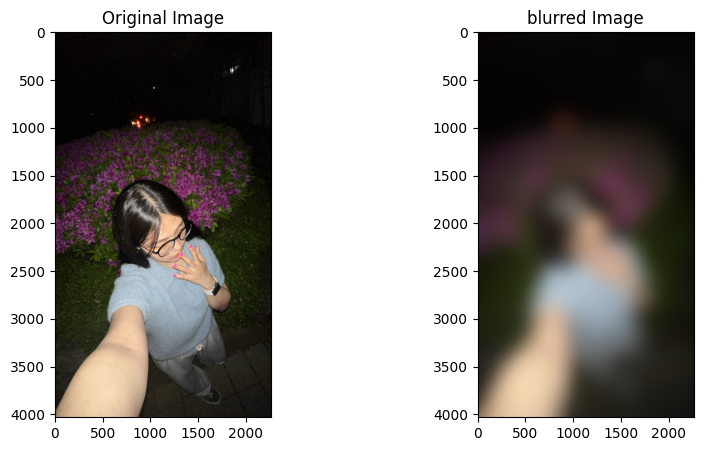

In [ ]:
from skimage import filters

# 가우시안 블러 적용
blurred_img = filters.gaussian(img, sigma=100, multichannel=True)

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 원래 이미지 표시
axes[0].imshow(img)
axes[0].set_title('Original Image')

# 잘라낸 이미지 표시
axes[1].imshow(blurred_img)
axes[1].set_title('blurred Image')

plt.show()



####③ 이미지 선택 영역 모자이크 처리하기####

---


이미지 선택 영역을 모자이크 처리하여 이미지를 볼 수 없도록 해 privacy를 보호하는 방법을 사용했습니다.
* skimage 모듈에서 filters를 사용
* 모자이크할 영역을 선택
* 선택한 영역에 모자이크를 적용 : gaussian()함수  
: gaussian(입력 이미지, 블러 강도, 이미지 컬러 여부)
* 결과를 img를 copy한 blurred_img2에 적용
* subplot 생성해 원래 이미지와 모자이크한 이미지 한번에 보여주기
* io.imshow() : 원래 이미지와 모자이크 이미지 시각화  

<ipython-input-10-04a2626d3f63>:11: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurred_region = filters.gaussian(region, sigma=10, multichannel=True)


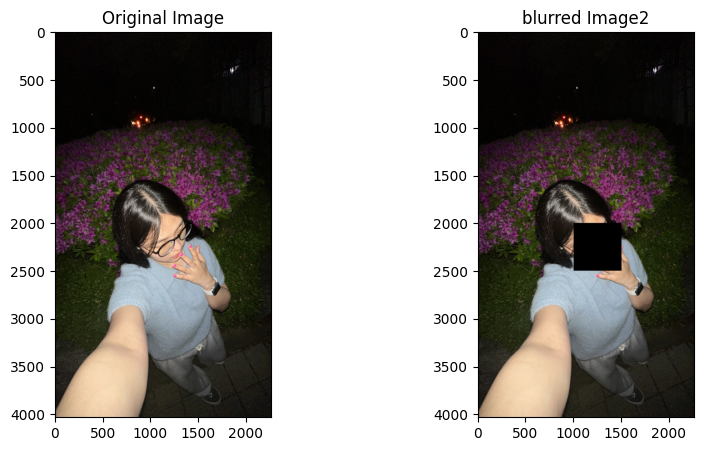

In [ ]:
from skimage import filters

# 원본 이미지 복사
blurred_img2 = img.copy()

# 모자이크할 영역 선택
x, y, width, height = 1000, 2000, 500, 500
region = img[y:y+height, x:x+width]

# 선택한 영역에 가우시안 블러 적용
blurred_region = filters.gaussian(region, sigma=10, multichannel=True)

# 결과를 원본 이미지에 적용
blurred_img2[y:y+height, x:x+width] = blurred_region

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 원래 이미지 표시
axes[0].imshow(img)
axes[0].set_title('Original Image')

# 잘라낸 이미지 표시
axes[1].imshow(blurred_img2)
axes[1].set_title('blurred Image2')

plt.show()



####④ 이미지 암호화 - XOR 방법####

---


이미지를 XOR 방식으로 암호화해 privacy를 보호하는 방법을 사용했습니다.
* 암호화 키 설정
* np.bitwise_xor()로 암호화  
: 이미지 배열/키 입력 -> 각 픽셀에 대해 XOR 연산 -> 암호화
* plt.imshow(encrypted_img) : 암호화한 이미지 시각화

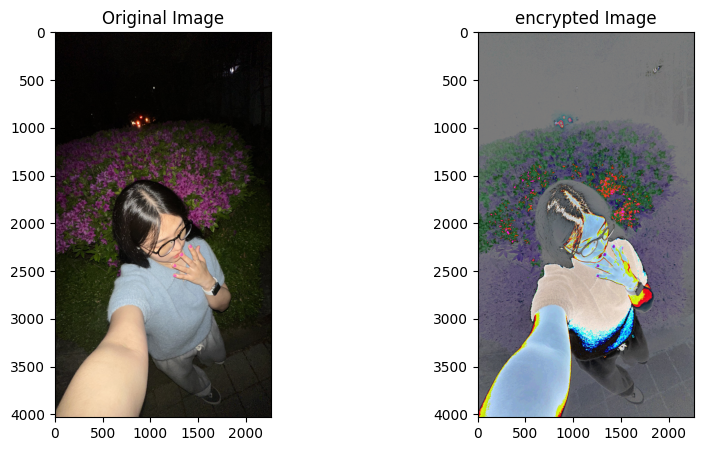

In [ ]:
# 암호화 키 설정 (임의의 값으로 설정)
encryption_key = 123

# 이미지를 암호화하기 위해 XOR 연산 수행
encrypted_img = np.bitwise_xor(img, encryption_key)

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 원래 이미지 표시
axes[0].imshow(img)
axes[0].set_title('Original Image')

# 잘라낸 이미지 표시
axes[1].imshow(encrypted_img)
axes[1].set_title('encrypted Image')

plt.show()



####⑤ 이미지 암호화 - AES 방법####

---


이미지를 AES 방식으로 암호화해 privacy를 보호하는 방법을 사용했습니다.
* cryptography 라이브러리에서 Fernet 모듈 가져와 대칭키 암호화
* 이미지는 바이너리 모드로 읽어온다.(기존 io.imread 방식으로 읽어오니 오류가 났음)  
* Fernet.generate_key() : key를 생성한다.
* encrypt() : AES 알고리즘을 이용하여 암호화하고 이미지를 저장한다.


In [ ]:
from cryptography.fernet import Fernet
# 이미지 읽기
img_path = '/content/drive/MyDrive/AI LAB/HW/hw1/hw1Img.jpg'
with open(img_path, 'rb') as f:
    image_data = f.read()

# AES 키 생성 또는 이미 존재하는 키 사용
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# 이미지를 암호화
encrypted_data = cipher_suite.encrypt(image_data)

# 암호화된 이미지 저장
encrypted_img_path = '/content/drive/MyDrive/AI LAB/HW/hw1/encrypted_hw1Img.jpg'
with open(encrypted_img_path, 'wb') as f:
    f.write(encrypted_data)